In [1]:
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import networkx as nx

from graphenv.examples.tsp.graph_utils import make_complete_planar_graph, plot_network

%matplotlib inline
%load_ext autoreload

In [2]:
%autoreload 2
# from graphenv.examples.tsp.tsp_env import TSPEnv

# Create and visualize simple network

In [3]:
N = 20
G = make_complete_planar_graph(N, seed=2)

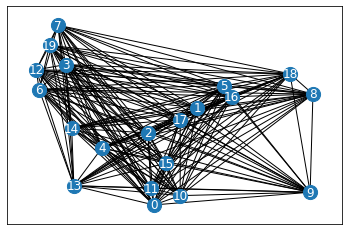

In [4]:
_ = plot_network(G, path=None)

In [5]:
def calc_cost(path):
    return -sum([G[path[i]][path[i + 1]]["weight"] for i in range(0, len(path) - 1)])

# Solve TSP using nx heuristics

TSP solution -3.215681555027801


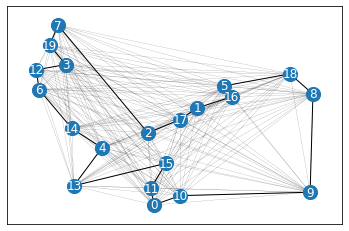

In [6]:
tsp = nx.approximation.traveling_salesman_problem
path_christofides = tsp(G, cycle=True)
print("TSP solution", calc_cost(path_christofides))

_ = plot_network(G, path=path_christofides)

TSP solution -3.5782736971658893


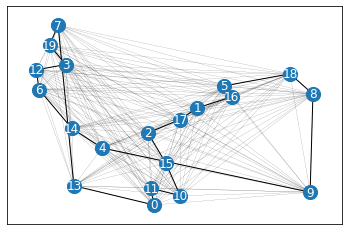

In [7]:
from networkx.algorithms.approximation.traveling_salesman import greedy_tsp

path_greedy = tsp(G, cycle=True, method=greedy_tsp)
print("TSP solution", calc_cost(path_greedy))

_ = plot_network(G, path=path_greedy)

In [8]:
%autoreload 2
from graphenv.examples.tsp.tsp_state import TSPState
from graphenv.graph_env import GraphEnv


state = TSPState(lambda: make_complete_planar_graph(N))
env = GraphEnv({
    "state": state,
    "max_num_children": N,
})

def run_greedy():

    env.reset()
    obs = env.make_observation()
    done = False
    total_reward = 0
    path = []

    while not done:
        action = obs['vertex_observations']['parent_dist'][obs['action_mask']].argmin()
        path += [obs['vertex_observations']['node_idx'][obs['action_mask']][action][0]]
        obs, reward, done, info = env.step(action)
        total_reward += reward
        
    return env.state.G, path, total_reward

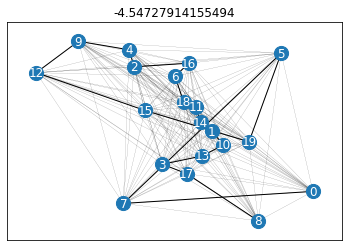

In [9]:
G, path, reward = run_greedy()
_ = plot_network(G, path=path)
_ = plt.title(reward)

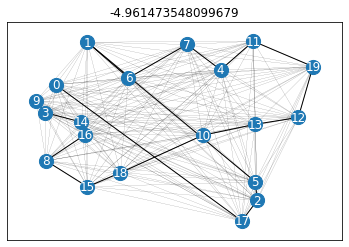

In [10]:
G, path, reward = run_greedy()
_ = plot_network(G, path=path)
_ = plt.title(reward)

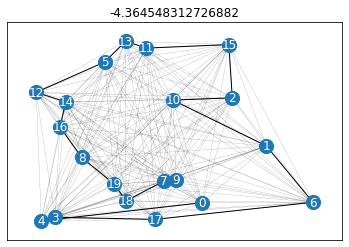

In [11]:
G, path, reward = run_greedy()
_ = plot_network(G, path=path)
_ = plt.title(reward)

In [12]:
from graphenv.examples.tsp.tsp_nfp_state import TSPNFPState


state = TSPNFPState(lambda: make_complete_planar_graph(N), max_num_neighbors=N)
env = GraphEnv({
    "state": state,
    "max_num_children": N,
})

def run_greedy_gnn():

    env.reset()
    obs = env.make_observation()
    done = False
    total_reward = 0
    path = []

    while not done:
        action = obs['vertex_observations']['distance'][obs['action_mask']].argmin()
        path += [obs['vertex_observations']['current_node'][obs['action_mask']][action]]
        obs, reward, done, info = env.step(action)
        total_reward += reward
        
    return env.state.G, path, total_reward

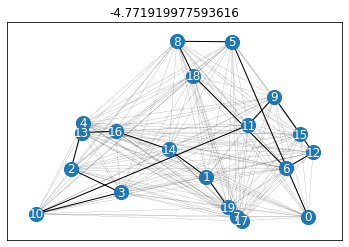

In [13]:
G, path, reward = run_greedy_gnn()
_ = plot_network(G, path=path)
_ = plt.title(reward)

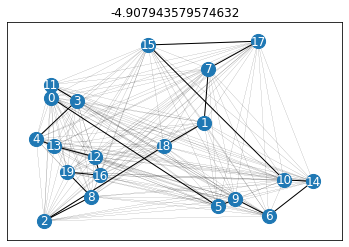

In [14]:
G, path, reward = run_greedy_gnn()
_ = plot_network(G, path=path)
_ = plt.title(reward)

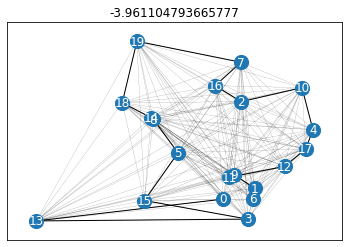

In [15]:
G, path, reward = run_greedy_gnn()
_ = plot_network(G, path=path)
_ = plt.title(reward)